# Regresión logistica

## Uso: Clasificación
* Saber si, dados N factores, una persona tiene cierta probabilidad de desarrollar cancer de algún tipo definido. 
* Saber laS probabilidades de que una persona quede en impago de deuda si se le da cierto prestamo
* Saber el grado de éxito de un autor en su primera publicación dadas ciertas características
* saber si una persona va a entrar al SNI dada la cantidad de años respecto a que terminó el doctorado, numero de publicación, "promedio" de indice h de las mismas, años que tiene como docente,  si ha ganado premios horas de clase que brinda a la semana.

* **TODO LO QUE SEA CLASIFICACION**

Tomando en cuenta que los Odds dan la probabilidad como una relación proporcional. 

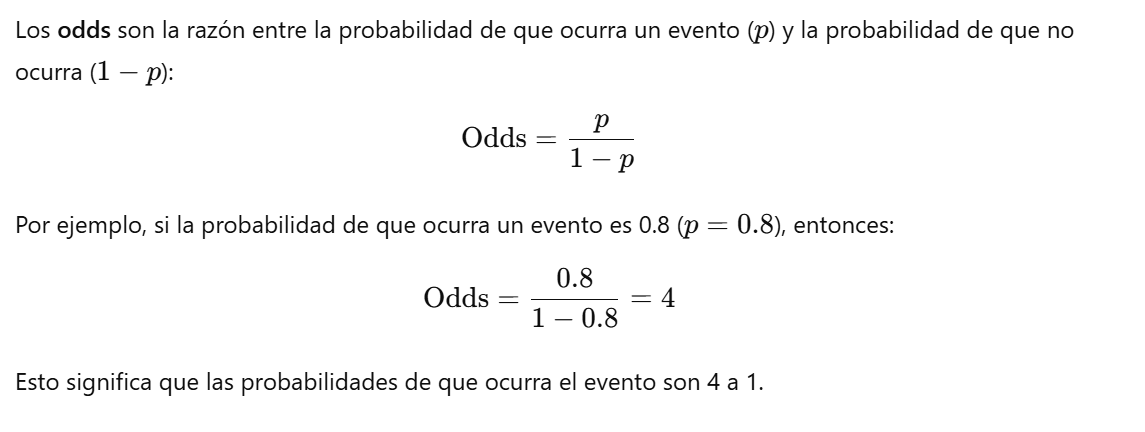

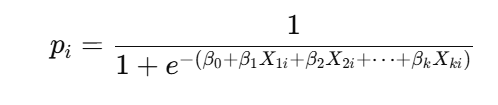

La transformación logit convierte los odds en una escala lineal mediante el logaritmo natural (ln)

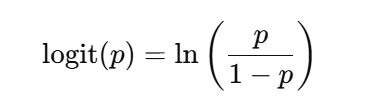

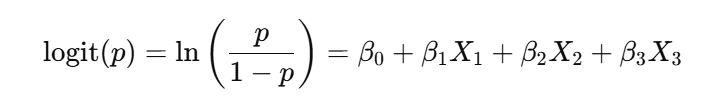

Los coeficientes asi en bruto dan la interpretación del valor de cambio sobre el logaritmo de la probabilidad en función del  cambio en el coeficiente . 

Los valores son específicos del modelo logit y no son probabilidades ni odds directamente

Asi (arriba, es como los paquetes estadisticos calculan el modelo) 

Los odds ratios se calculan de forma independiente (abajo) lo cual permite interpretar el efecto de cada variable en términos de multiplicación de los odds.

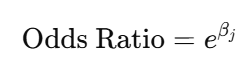

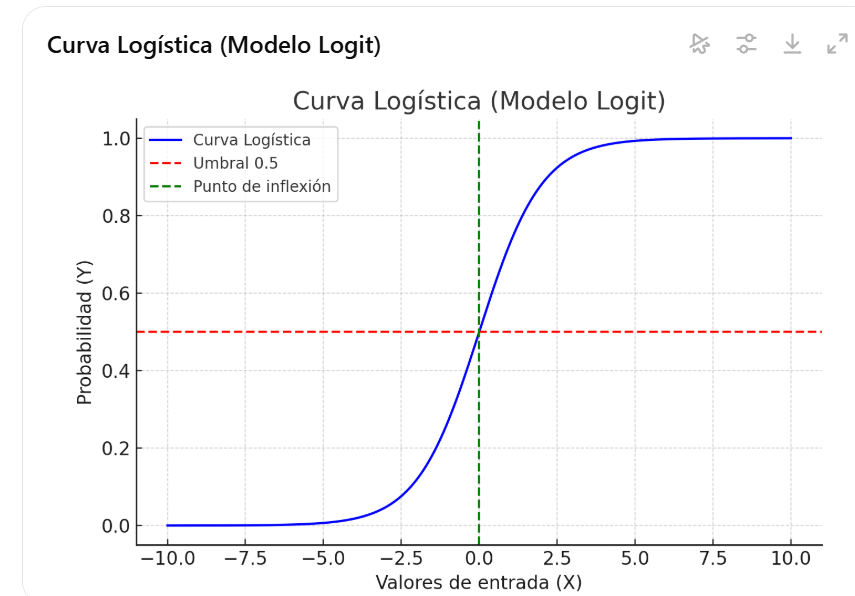

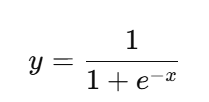

**Interpretación**
Es siempre una proporción. 

Ejemplo: 

* 0.5 OR= disminuye en 50% la probabilidad por unidad. 
* 1.2 P*1.2= aumenta en 20% la probabilidad
* 2.5 P es 150% veces más alta

Aunque aclarar que no son probabilidades en sí mismas. 

Es la proporción entre la probabilidad de que ocurra un evento y de que no ocurra. Generalmente pensada para interpretarse en relación a la variable en sí misma

(hombre vs mujer; endeudado vs no)


**Allí es donde entran los efectos marginales**

Los marginales miden cómo cambia la probabilidad (𝑝) de que ocurra un evento cuando una variable independiente (𝑋𝑗) cambia en una unidad, manteniendo las demás variables constantes. A diferencia de los odds ratios, que miden el cambio relativo en los odds, los marginales nos dicen directamente cuánto cambia la probabilidad absoluta (p)

los efectos marginales se calculan como la derivada parcial de la probabilidad 𝑝 respecto a cada variable independiente 𝑋𝑗  

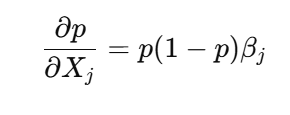

## Resumen de los resultados

Odds Ratios: Miden el cambio relativo en los odds cuando Xj cambia en una unidad.
* Útiles para comparar efectos entre variables o categorías, pero no nos dan directamente la probabilidad.

Marginales: Miden el cambio absoluto en la probabilidad (p) cuando 𝑋j cambia en una unidad.
* Más intuitivos para interpretar el impacto en términos de probabilidad.

# Ejercicio

In [1]:
!pip install requests


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [2]:
import requests
import json

# Usuario y repositorio específicos
user = 'laloraptor'
repo = 'BasesClase1'

# URL de la API de GitHub para listar el contenido del repositorio
url = f'https://api.github.com/repos/{user}/{repo}/contents/'

# Realizar la solicitud GET a la API de GitHub
response = requests.get(url)

# Comprobar si la solicitud fue exitosa
if response.status_code == 200:
    files = response.json()
    
    # Guardar la respuesta en un archivo JSON
    with open('repositorio_contenido.json', 'w') as json_file:
        json.dump(files, json_file, indent=4)  # Guardamos el contenido formateado

    print("Archivos en el repositorio guardados en 'repositorio_contenido.json':")
    for file in files:
        if file['type'] == 'file':  # Solo archivos
            print(f"Nombre: {file['name']}, URL: {file['download_url']}")
else:
    print(f"Error al acceder al repositorio. Código de estado: {response.status_code}")


Archivos en el repositorio guardados en 'repositorio_contenido.json':
Nombre: Clustering_Clientes_Bancarios.ipynb, URL: https://raw.githubusercontent.com/laloraptor/BasesClase1/main/Clustering_Clientes_Bancarios.ipynb
Nombre: Clustering_Estudiantes_Detallado.ipynb, URL: https://raw.githubusercontent.com/laloraptor/BasesClase1/main/Clustering_Estudiantes_Detallado.ipynb
Nombre: Clustering_Investigadores.ipynb, URL: https://raw.githubusercontent.com/laloraptor/BasesClase1/main/Clustering_Investigadores.ipynb
Nombre: CrearNoSupervisado.ipynb, URL: https://raw.githubusercontent.com/laloraptor/BasesClase1/main/CrearNoSupervisado.ipynb
Nombre: SNI.csv, URL: https://raw.githubusercontent.com/laloraptor/BasesClase1/main/SNI.csv
Nombre: SQL.ipynb, URL: https://raw.githubusercontent.com/laloraptor/BasesClase1/main/SQL.ipynb
Nombre: datasetBanco.csv, URL: https://raw.githubusercontent.com/laloraptor/BasesClase1/main/datasetBanco.csv
Nombre: datasetBanco_concluster.csv, URL: https://raw.githubuser

In [3]:
import requests

# URL del archivo en GitHub
url = 'https://raw.githubusercontent.com/laloraptor/BasesClase1/main/SNI.csv'

# Realizar la solicitud GET al archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Guardar el contenido en un archivo local
    with open('SNI.csv', 'wb') as file:
        file.write(response.content)
    print("Archivo descargado exitosamente como df_repositorios.csv")
else:
    print("Error al descargar el archivo.")


Archivo descargado exitosamente como df_repositorios.csv


1. Importar SNI.CSV a VSC

Dame el código para importar "SNI.cvs" como data frame llamado SNI



In [4]:
import pandas as pd

# Importar el archivo CSV como DataFrame
SNI = pd.read_csv('SNI.csv')

# Mostrar las primeras filas del DataFrame para verificar que se importó correctamente
print(SNI.head())

   anios_desde_doctorado  numero_publicaciones  indice_h_promedio  \
0                      6                     7           8.741102   
1                     19                     7           8.018659   
2                     28                    12           1.356569   
3                     14                    11           5.324563   
4                     10                     9           1.944372   

   anios_docente  ha_ganado_premios  horas_clase_semana  entra_sni  
0             23                  0                  27          1  
1              9                  0                  24          1  
2             13                  0                  22          1  
3              5                  0                  22          1  
4              2                  0                   6          0  


"Dame el codigo para dividir mi data frame "SNI" en conjunto de entrenamiento y prueba"

In [5]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(SNI, test_size=0.2, random_state=42)

# Mostrar el tamaño de cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {len(train_data)}")
print(f"Tamaño del conjunto de prueba: {len(test_data)}")



Tamaño del conjunto de entrenamiento: 320
Tamaño del conjunto de prueba: 80


Estas son mis columnas 

anios_desde_doctorado,numero_publicaciones,indice_h_promedio,anios_docente,ha_ganado_premios,horas_clase_semana,entra_sni

dame el codigo que ajuste un modelo logit donde la variable dependiente es "entra_sni" quiero ver el summary del modelo

In [6]:
import statsmodels.api as sm

# Variables dependiente e independientes
X_train = train_data[['anios_desde_doctorado', 'numero_publicaciones', 'indice_h_promedio',
                      'anios_docente', 'ha_ganado_premios', 'horas_clase_semana']]  # Variables independientes
y_train = train_data['entra_sni']  # Variable dependiente

# Agregar una constante a las variables independientes
X_train = sm.add_constant(X_train)

# Ajustar el modelo logit
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Mostrar el resumen del modelo
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.232071
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              entra_sni   No. Observations:                  320
Model:                          Logit   Df Residuals:                      313
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                  0.3277
Time:                        18:50:02   Log-Likelihood:                -74.263
converged:                       True   LL-Null:                       -110.47
Covariance Type:            nonrobust   LLR p-value:                 1.311e-13
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.3849      1.173     -3.737      0.000      -6.684      -2.

Ahora quiero que evalues el modelo y hagas una matriz de confusion, El modelo lo acabamos de entrenar y se llama "result"


In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Preparar los datos de prueba
X_test = test_data[['anios_desde_doctorado', 'numero_publicaciones', 'indice_h_promedio',
                    'anios_docente', 'ha_ganado_premios', 'horas_clase_semana']]  # Variables independientes
y_test = test_data['entra_sni']  # Variable dependiente

# Agregar una constante al conjunto de prueba
X_test = sm.add_constant(X_test)

# Generar predicciones usando el modelo ajustado
y_pred_prob = result.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Clasificar como 1 si la probabilidad > 0.5, de lo contrario 0

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[ 4  2]
 [ 2 72]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.97      0.97      0.97        74

    accuracy                           0.95        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.95      0.95      0.95        80



Precisión: de todas las predicciones los positivos cuantos fueron correctos?

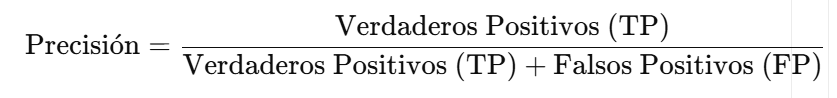

Sensibilidad (Recall): De todos los realmente positivos, cuantos fueron identificados correctamente?


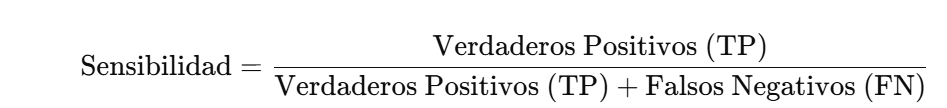

Accurracy: precisión global

Dame el codigo para obtener una grafica del balanceo de datos entre mis categorias de salida

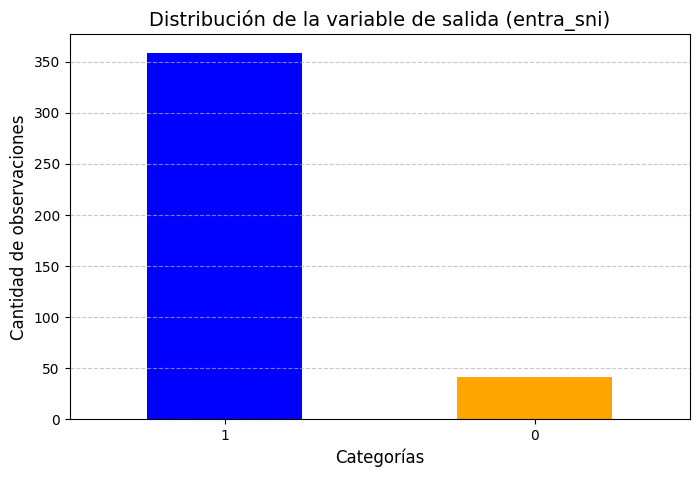

In [8]:
#!pip install matplotlib
import matplotlib.pyplot as plt

# Contar las observaciones en cada categoría
category_counts = SNI['entra_sni'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=['blue', 'orange'])

# Personalizar la gráfica
plt.title('Distribución de la variable de salida (entra_sni)', fontsize=14)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Cantidad de observaciones', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()


Dame el codigo para hacer oversampling a mis datos de entrada en el df llamado SNI. Mis variables son estas
Independientes:'anios_desde_doctorado', 'numero_publicaciones', 'indice_h_promedio', 'anios_docente', 'ha_ganado_premios', 'horas_clase_semana'
dependiente: entra_sni'

Grafica los resultados del oversampling

Distribución después del SMOTE:
entra_sni
1    359
0    359
Name: count, dtype: int64


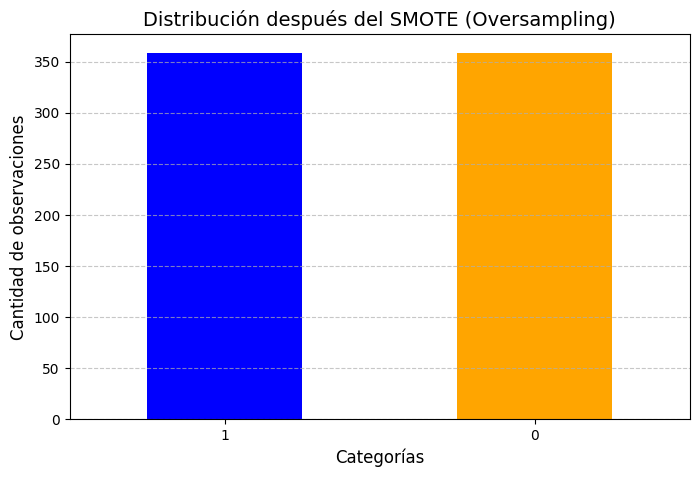

In [9]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separar variables independientes y dependientes
X = SNI[['anios_desde_doctorado', 'numero_publicaciones', 'indice_h_promedio',
         'anios_docente', 'ha_ganado_premios', 'horas_clase_semana']]
y = SNI['entra_sni']

# Aplicar SMOTE para generar oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar el balance después del oversampling
print("Distribución después del SMOTE:")
print(y_resampled.value_counts())

# Convertir a DataFrame para análisis posterior si es necesario
SNI_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='entra_sni')], axis=1)

# Guardar o mostrar la distribución en un gráfico
import matplotlib.pyplot as plt

# Contar las observaciones en cada categoría después del oversampling
category_counts_resampled = y_resampled.value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(8, 5))
category_counts_resampled.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución después del SMOTE (Oversampling)', fontsize=14)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Cantidad de observaciones', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


usa los datos del oversampling para ajustar un modelo logit de nuevo, separa los datos en entrenamiento y prueba, haz la evalución del modelo 
X_resampled, y_resampled

In [10]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Dividir los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Agregar una constante a los conjuntos de entrenamiento y prueba
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Ajustar el modelo logit
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Mostrar el resumen del modelo
print("Resumen del modelo logit con datos balanceados:")
print(result.summary())

# Generar predicciones para el conjunto de prueba
y_pred_prob = result.predict(X_test_const)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Clasificar como 1 si la probabilidad > 0.5

# Evaluar el modelo
print("\nMatriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.368124
         Iterations 8
Resumen del modelo logit con datos balanceados:
                           Logit Regression Results                           
Dep. Variable:              entra_sni   No. Observations:                  574
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                  0.4689
Time:                        18:50:03   Log-Likelihood:                -211.30
converged:                       True   LL-Null:                       -397.84
Covariance Type:            nonrobust   LLR p-value:                 1.719e-77
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.4570      

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


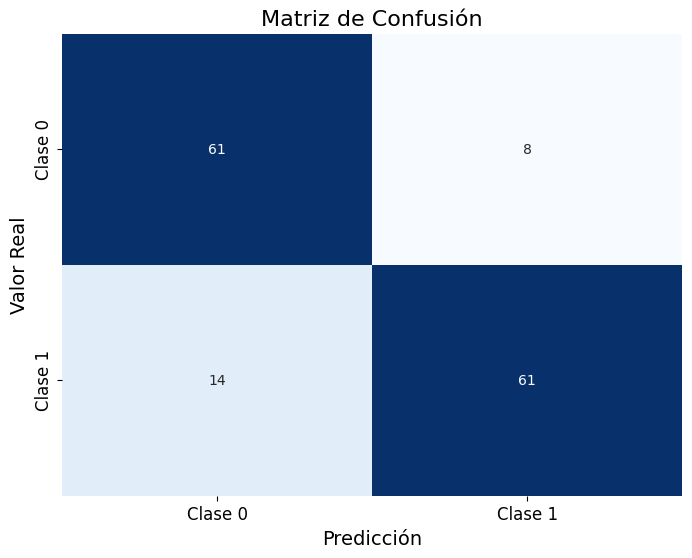

In [11]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Personalizar la gráfica
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Valor Real', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)

# Mostrar la gráfica
plt.show()


obtener odds ratio

ajusté mi modelo con este codigo 

"from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, classification_report

import numpy as np

Dividir los datos balanceados en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Agregar una constante a los conjuntos de entrenamiento y prueba

X_train_const = sm.add_constant(X_train)

X_test_const = sm.add_constant(X_test)

Ajustar el modelo logit

logit_model = sm.Logit(y_train, X_train_const)

result = logit_model.fit()

Mostrar el resumen del modelo

print("Resumen del modelo logit con datos balanceados:")

print(result.summary())

Generar predicciones para el conjunto de prueba

y_pred_prob = result.predict(X_test_const)

y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Clasificar como 1 si la probabilidad > 0.5

Evaluar el modelo

print("\nMatriz de confusión:")

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))"

**sabiendo eso dame**
1. los odds ratio y 2. dame los marginales, tambien graficalos

Odds Ratio:
                Variable  Odds Ratio
0                  const    0.000577
1  anios_desde_doctorado    1.075382
2   numero_publicaciones    1.550099
3      indice_h_promedio    1.687584
4          anios_docente    1.018488
5      ha_ganado_premios   48.446438
6     horas_clase_semana    0.995262


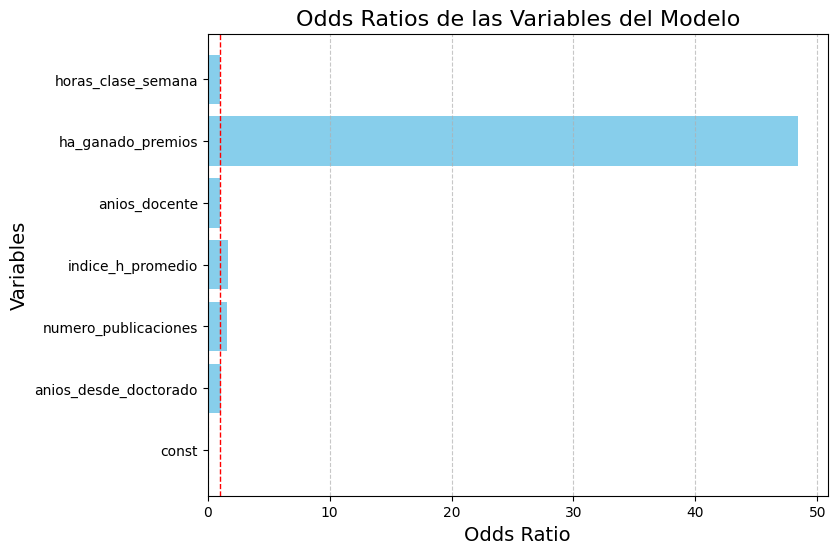

In [12]:
import pandas as pd
import numpy as np

# Calcular los Odds Ratio
odds_ratios = np.exp(result.params)
odds_ratios_df = pd.DataFrame({
    'Variable': odds_ratios.index,
    'Odds Ratio': odds_ratios.values
})

# Mostrar los Odds Ratio
print("Odds Ratio:")
print(odds_ratios_df)

# Graficar los Odds Ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(odds_ratios_df['Variable'], odds_ratios_df['Odds Ratio'], color='skyblue')
plt.axvline(x=1, color='red', linestyle='--', linewidth=1)  # Línea de referencia en OR=1
plt.title('Odds Ratios de las Variables del Modelo', fontsize=16)
plt.xlabel('Odds Ratio', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


marginales

Efectos Marginales:
                          dy/dx  Std. Err.          z      Pr(>|z|)  \
anios_desde_doctorado  0.008404   0.001452   5.787586  7.140523e-09   
numero_publicaciones   0.050685   0.003930  12.898199  4.607398e-38   
indice_h_promedio      0.060512   0.005254  11.517088  1.082059e-30   
anios_docente          0.002118   0.002230   0.949770  3.422290e-01   
ha_ganado_premios      0.448718   0.085431   5.252374  1.501513e-07   
horas_clase_semana    -0.000549   0.001535  -0.357766  7.205185e-01   

                       Conf. Int. Low  Cont. Int. Hi.  
anios_desde_doctorado        0.005558        0.011250  
numero_publicaciones         0.042983        0.058387  
indice_h_promedio            0.050214        0.070809  
anios_docente               -0.002253        0.006490  
ha_ganado_premios            0.281275        0.616160  
horas_clase_semana          -0.003558        0.002460  


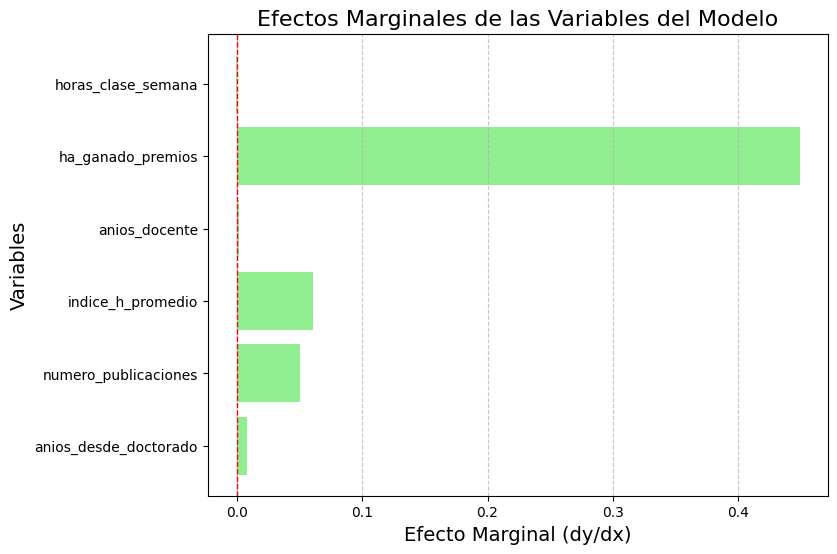

In [13]:
# Calcular efectos marginales
marginal_effects = result.get_margeff()
marginal_effects_summary = marginal_effects.summary_frame()

# Mostrar los efectos marginales
print("Efectos Marginales:")
print(marginal_effects_summary)

# Graficar los efectos marginales
plt.figure(figsize=(8, 6))
plt.barh(marginal_effects_summary.index, marginal_effects_summary['dy/dx'], color='lightgreen')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Línea de referencia en 0
plt.title('Efectos Marginales de las Variables del Modelo', fontsize=16)
plt.xlabel('Efecto Marginal (dy/dx)', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Exportar modelo

"mi modelo se llama "result" exportalo en .pkl para que pueda utilizarlo en otra cosa"

import pickle

Guardar el modelo en un archivo .pkl

file_path = '/mnt/data/logit_model_result.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(result, file)

file_path

Me lo regresó así. Debemos corregir la ruta

In [14]:
import pickle

# Guardar el modelo 'result' en un archivo .pkl
file_path = 'logit_model_result.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(result, file)

file_path

'logit_model_result.pkl'

Crear aplicación flash

crea una aplicación flask para desplegar mi modelo. 

te recuerdo que mis variables son estas 

anios_desde_doctorado,numero_publicaciones,indice_h_promedio,anios_docente,ha_ganado_premios,horas_clase_semana

y la dependiente es "entra_sni". 

Mi modelo exportado es logit_model_result.pkl

Dame primero el codigo para la aplicación flask y luego dame el codigo para el html, que se atractivo, imagina que quiero ponerlo en una pagina de mi universidad para que los investigadores consulten la probabilidad que tienen de entrar al SNI (sistema nacional de investigadores). Haz que el index se llame "index_sni.html" 

codigo para Flask

In [15]:
!pip install flask

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [17]:
from flask import Flask, request, render_template
import pickle
import numpy as np

# Cargar el modelo guardado
with open('logit_model_result.pkl', 'rb') as file:
    model = pickle.load(file)

# Crear la aplicación Flask
app = Flask(__name__)

# Ruta principal
@app.route('/')
def index():
    return render_template('index_sni.html')

# Ruta para procesar el formulario
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Obtener los valores del formulario
        anios_desde_doctorado = float(request.form['anios_desde_doctorado'])
        numero_publicaciones = float(request.form['numero_publicaciones'])
        indice_h_promedio = float(request.form['indice_h_promedio'])
        anios_docente = float(request.form['anios_docente'])
        ha_ganado_premios = int(request.form['ha_ganado_premios'])
        horas_clase_semana = float(request.form['horas_clase_semana'])
        
        # Crear el array de entrada para el modelo
        input_data = np.array([1, anios_desde_doctorado, numero_publicaciones, 
                               indice_h_promedio, anios_docente, 
                               ha_ganado_premios, horas_clase_semana])
        
        # Calcular la probabilidad
        prob = model.predict([input_data])[0]
        prob_percentage = round(prob * 100, 2)
        
        # Determinar el resultado
        result_text = f"La probabilidad de entrar al SNI es del {prob_percentage}%."
    except Exception as e:
        result_text = f"Error en el cálculo: {str(e)}"
    
    return render_template('index_sni.html', result=result_text)

if __name__ == '__main__':
    app.run(debug=False) #Pasar debug a false


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [07/Feb/2025 18:51:06] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2025 18:51:23] "POST /predict HTTP/1.1" 200 -


Vamos a crear una fast api 

1. Entrené un modelo logit con  mi base SNI.CSV que se ve asi 
anios_desde_doctorado,numero_publicaciones,indice_h_promedio,anios_docente,ha_ganado_premios,horas_clase_semana,entra_sni
6,7,8.741101574702842,23,0,27,1
19,7,8.018658900040148,9,0,24,1
2. Exporté mi modelo modelo logit_model_result.pkl. 

3. Quiero una fast api con un solo endpoint a donde pueda enviar datos de esas variables para obtener las prediccionees del modelo 

4. Dame primero el codigo de la API y luego el HTML de bienvenida sencillo
Dame la documentación de la api. 

ESTO QUE SIGUE GUARDARLO EN UN ARCHIVO MAIN. COMO EN EL CASO DEL MODELO DESPLEGADO

In [ ]:
#!pip install fastapi pydantic uvicorn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import numpy as np

# Cargar el modelo entrenado
with open('logit_model_result.pkl', 'rb') as file:
    model = pickle.load(file)

# Crear la aplicación FastAPI
app = FastAPI(title="Predicciones SNI", description="API para predecir la probabilidad de ingresar al Sistema Nacional de Investigadores (SNI)")

# Modelo para los datos de entrada
class SNIInput(BaseModel):
    anios_desde_doctorado: float
    numero_publicaciones: int
    indice_h_promedio: float
    anios_docente: float
    ha_ganado_premios: int
    horas_clase_semana: float

# Endpoint para predicciones
@app.post("/predict", tags=["Predicción"])
def predict_sni(data: SNIInput):
    """
    Calcula la probabilidad de ingresar al SNI basado en los datos de entrada.
    """
    try:
        # Crear el array de entrada para el modelo
        input_data = np.array([1,  # Intercepto
                               data.anios_desde_doctorado,
                               data.numero_publicaciones,
                               data.indice_h_promedio,
                               data.anios_docente,
                               data.ha_ganado_premios,
                               data.horas_clase_semana])

        # Generar la predicción
        prob = model.predict([input_data])[0]
        prob_percentage = round(prob * 100, 2)

        return {"probability": prob_percentage, 
                "message": f"La probabilidad de ingresar al SNI es del {prob_percentage}%."}
    except Exception as e:
        return {"error": str(e)}

# Endpoint de bienvenida
@app.get("/", tags=["Bienvenida"])
def home():
    """
    Bienvenida a la API de Predicción SNI.
    """
    return {
        "message": "Bienvenido a la API de Predicción SNI. Envía datos al endpoint /predict para obtener predicciones.",
        "documentation": "/docs",
    }

# Ejecutar la aplicación
if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="127.0.0.1", port=8000)


# al ingresar ir a /docs para ver la interfaz de prueba


RuntimeError: asyncio.run() cannot be called from a running event loop

Prueba

quiero usarlo. 

quiero usar nueva_base_sni.csv

que tiene anios_desde_doctorado,numero_publicaciones,indice_h_promedio,anios_docente,ha_ganado_premios,horas_clase_semana

quiero saber si cada uno de mis elementos va a entrar al SNI 

1. Parsea el CSV para obtener 1 a 1 los elementos esperados. En este caso las variables coinciden. 
2. Haz una solicitud uno a uno de esos elemenetos
3. Guarda cada resultado en un json, ve añadiendo confirme recibas respuesta.
4. Finalmente añade cada uno de los resultados al CSV original en una columna llamada "respuesta api"


In [29]:
import pandas as pd
import requests
import json

# Cargar el CSV con los datos
input_csv = 'nueva_base_sni.csv'
data = pd.read_csv(input_csv)

# Endpoint de la API
api_url = "http://127.0.0.1:8000/predict"

# Lista para almacenar las respuestas
results = []

# Iterar sobre cada fila del CSV
for _, row in data.iterrows():
    # Crear el payload para la solicitud
    payload = {
        "anios_desde_doctorado": row['anios_desde_doctorado'], #indica del primer lado la entrada que la api espera, del otro lado la que le daremos
        "numero_publicaciones": row['numero_publicaciones'],
        "indice_h_promedio": row['indice_h_promedio'],
        "anios_docente": row['anios_docente'],
        "ha_ganado_premios": row['ha_ganado_premios'],
        "horas_clase_semana": row['horas_clase_semana']
    }
    
    # Hacer la solicitud POST
    response = requests.post(api_url, json=payload)
    
    # Parsear la respuesta
    if response.status_code == 200:
        response_data = response.json()
        results.append(response_data)  # Guardar en la lista de resultados
    else:
        # En caso de error, guardar un mensaje de error
        results.append({"error": f"HTTP {response.status_code}", "payload": payload})

# Guardar los resultados en un archivo JSON
json_output = 'resultados_sni.json'
with open(json_output, 'w') as json_file:
    json.dump(results, json_file, indent=4)

# Agregar los resultados al DataFrame original en una nueva columna
data['respuesta_api'] = [json.dumps(result) for result in results]

# Guardar el nuevo CSV con los resultados
output_csv = 'nueva_base_sni_con_respuestas.csv'
data.to_csv(output_csv, index=False)

{
    "json_output": json_output,
    "output_csv": output_csv
}


{'json_output': 'resultados_sni.json',
 'output_csv': 'nueva_base_sni_con_respuestas.csv'}